In [1]:
import pymatgen as pg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import RMSAD_tool
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

C:\Users\cepha\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [108]:
import warnings

# Set warnings filter to ignore all warnings
warnings.filterwarnings("ignore")

# Your code goes here
# Load the data, perform visualizations, etc.


In [15]:
df = pd.read_csv("training.csv")

#make elemental/B2 features
dip = []
VEC = []
VECsd = []
bondSD = []
for chemform in df["Chemform"]:
    comp = Composition(chemform)
    elements = {}
    for element in comp:
        elements[str(element)] = comp.get_atomic_fraction(element)
    pairs = {}
    for element1 in elements:
        for element2 in elements:
            pair = element1 + element2
            concentration = elements[element1] * elements[element2]
            pairs[pair] = concentration
    
    dip.append(RMSAD_tool.get_feature("d band bimodality",pairs))
    VEC.append(RMSAD_tool.get_VEC(elements)-5.7)
    VECsd.append(RMSAD_tool.get_VEC_SD(elements))
    bondSD.append(RMSAD_tool.get_feature_SD("half bond",pairs))

#feature engineering
df["d-band bimodality"] = dip
df["d-band bimodality^2"] = df["d-band bimodality"]**2
df["VEC-5.7"] = VEC
df["VEC5.7^2"] = df["VEC-5.7"]**2
df["VEC SD from 5.7"] = VECsd
df["VECSD5.7^2"] = df["VEC SD from 5.7"]**2
df["Bond SD"] = bondSD
df["Dbimodality^2xVEC5.7^2"] = df["VEC5.7^2"]*df["d-band bimodality^2"]
df["Dbimodality^2xVECSD5.7^2"] = df["VECSD5.7^2"]*df["d-band bimodality^2"]
df.to_csv("traindata.csv", index=False) 
df

,Unnamed: 0,Chemform,N,RMSAD (SQS),d-band bimodality,d-band bimodality^2,VEC-5.7,VEC5.7^2,VEC SD from 5.7,VECSD5.7^2,Bond SD,Dbimodality^2xVEC5.7^2,Dbimodality^2xVECSD5.7^2
0,0,NbTaMoWRu,5,0.063815,0.053543,0.002867,0.30,0.0900,1.135782,1.290000,0.028272,0.000258,0.003698
1,1,TiZrHfVNb,5,0.319351,0.061850,0.003825,-1.30,1.6900,1.389244,1.930000,0.064811,0.006465,0.007383
2,2,WNbTaMoV,5,0.066301,0.055429,0.003072,-0.30,0.0900,0.574456,0.330000,0.035764,0.000277,0.001014
3,3,VTaMoWRe,5,0.045433,0.053694,0.002883,0.10,0.0100,0.754983,0.570000,0.032887,0.000029,0.001643
4,4,HfMo3V2Ta2Nb2,5,0.098663,0.056545,0.003197,-0.50,0.2500,0.781025,0.610000,0.047074,0.000799,0.001950
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,209,WVMo2,3,0.049079,0.049132,0.002414,0.05,0.0025,0.435890,0.190000,0.025383,0.000006,0.000459
210,210,ZrHf3V2Mo2W2,5,0.176459,0.057693,0.003328,-0.70,0.4900,1.135782,1.290000,0.067614,0.001631,0.004294
211,211,ZrNb,2,0.164482,0.053905,0.002906,-1.20,1.4400,1.300000,1.690000,0.042012,0.004184,0.004911
212,212,ZrWNb,3,0.125631,0.057772,0.003338,-0.70,0.4900,1.075484,1.156667,0.050001,0.001635,0.003861


In [3]:
import pandas as pd
import pymatgen as pg 
import RMSAD_tool  


In [5]:
from pymatgen.core.composition import Composition 

In [8]:

df = pd.read_csv("training.csv")


In [12]:
# Make elemental/B2 features
dip = []
VEC = []
VECsd = []
bondSD = []
for chemform in df["Chemform"]:
    comp = Composition(chemform)
    elements = {}
    for element in comp:
        elements[str(element)] = comp.get_atomic_fraction(element)
    pairs = {}
    for element1 in elements:
        for element2 in elements:
            pair = element1 + element2
            concentration = elements[element1] * elements[element2]
            pairs[pair] = concentration

    dip.append(RMSAD_tool.get_feature("d band bimodality", pairs))
    VEC.append(RMSAD_tool.get_VEC(elements) - 5.7)
    VECsd.append(RMSAD_tool.get_VEC_SD(elements))
    bondSD.append(RMSAD_tool.get_feature_SD("half bond", pairs))

# Feature engineering
df["d-band bimodality"] = dip
df["d-band bimodality^2"] = df["d-band bimodality"]**2
df["VEC-5.7"] = VEC
df["VEC5.7^2"] = df["VEC-5.7"]**2
df["VEC SD from 5.7"] = VECsd
df["VECSD5.7^2"] = df["VEC SD from 5.7"]**2
df["Bond SD"] = bondSD
df["Dbimodality^2xVEC5.7^2"] = df["VEC5.7^2"] * df["d-band bimodality^2"]
df["Dbimodality^2xVECSD5.7^2"] = df["VECSD5.7^2"] * df["d-band bimodality^2"]
df.to_csv("traindata.csv", index=False) 

In [13]:
df

,Unnamed: 0,Chemform,N,RMSAD (SQS),d-band bimodality,d-band bimodality^2,VEC-5.7,VEC5.7^2,VEC SD from 5.7,VECSD5.7^2,Bond SD,Dbimodality^2xVEC5.7^2,Dbimodality^2xVECSD5.7^2
0,0,NbTaMoWRu,5,0.063815,0.053543,0.002867,0.30,0.0900,1.135782,1.290000,0.028272,0.000258,0.003698
1,1,TiZrHfVNb,5,0.319351,0.061850,0.003825,-1.30,1.6900,1.389244,1.930000,0.064811,0.006465,0.007383
2,2,WNbTaMoV,5,0.066301,0.055429,0.003072,-0.30,0.0900,0.574456,0.330000,0.035764,0.000277,0.001014
3,3,VTaMoWRe,5,0.045433,0.053694,0.002883,0.10,0.0100,0.754983,0.570000,0.032887,0.000029,0.001643
4,4,HfMo3V2Ta2Nb2,5,0.098663,0.056545,0.003197,-0.50,0.2500,0.781025,0.610000,0.047074,0.000799,0.001950
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,209,WVMo2,3,0.049079,0.049132,0.002414,0.05,0.0025,0.435890,0.190000,0.025383,0.000006,0.000459
210,210,ZrHf3V2Mo2W2,5,0.176459,0.057693,0.003328,-0.70,0.4900,1.135782,1.290000,0.067614,0.001631,0.004294
211,211,ZrNb,2,0.164482,0.053905,0.002906,-1.20,1.4400,1.300000,1.690000,0.042012,0.004184,0.004911
212,212,ZrWNb,3,0.125631,0.057772,0.003338,-0.70,0.4900,1.075484,1.156667,0.050001,0.001635,0.003861


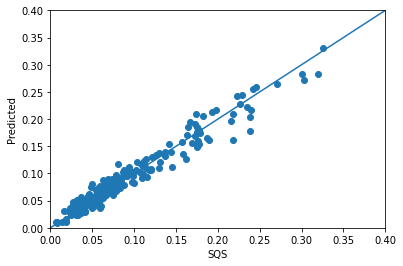

In [ ]:
x = df[["Bond SD","Dbimodality^2xVEC5.7^2","Dbimodality^2xVECSD5.7^2"]]
y = df["RMSAD (SQS)"]

#fit linear regression
linreg = LinearRegression(fit_intercept=False)
linreg.fit(x,y)
y_hat = linreg.predict(x)
df["RMSAD (Predict)"] = y_hat

#plot results
plt.scatter(y,y_hat)
plt.plot([0,0.4],[0,0.4])
plt.xlim(0,0.4)
plt.ylim(0,0.4)
plt.xlabel("SQS")
plt.ylabel("Predicted")

plt.show()

In [ ]:
df

,Unnamed: 0,Chemform,N,RMSAD (SQS),d-band bimodality,d-band bimodality^2,VEC-5.7,VEC5.7^2,VEC SD from 5.7,VECSD5.7^2,Bond SD,Dbimodality^2xVEC5.7^2,Dbimodality^2xVECSD5.7^2,RMSAD (Predict)
0,0,NbTaMoWRu,5,0.063815,0.053543,0.002867,0.30,0.0900,1.135782,1.290000,0.028272,0.000258,0.003698,0.076320
1,1,TiZrHfVNb,5,0.319351,0.061850,0.003825,-1.30,1.6900,1.389244,1.930000,0.064811,0.006465,0.007383,0.283597
2,2,WNbTaMoV,5,0.066301,0.055429,0.003072,-0.30,0.0900,0.574456,0.330000,0.035764,0.000277,0.001014,0.061012
3,3,VTaMoWRe,5,0.045433,0.053694,0.002883,0.10,0.0100,0.754983,0.570000,0.032887,0.000029,0.001643,0.058237
4,4,HfMo3V2Ta2Nb2,5,0.098663,0.056545,0.003197,-0.50,0.2500,0.781025,0.610000,0.047074,0.000799,0.001950,0.094925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,209,WVMo2,3,0.049079,0.049132,0.002414,0.05,0.0025,0.435890,0.190000,0.025383,0.000006,0.000459,0.036991
210,210,ZrHf3V2Mo2W2,5,0.176459,0.057693,0.003328,-0.70,0.4900,1.135782,1.290000,0.067614,0.001631,0.004294,0.160184
211,211,ZrNb,2,0.164482,0.053905,0.002906,-1.20,1.4400,1.300000,1.690000,0.042012,0.004184,0.004911,0.184875
212,212,ZrWNb,3,0.125631,0.057772,0.003338,-0.70,0.4900,1.075484,1.156667,0.050001,0.001635,0.003861,0.133608


After performing data augmentation and feature engineering, the next steps typically involve further evaluation and analysis of the augmented dataset. Here's what you can do:

### 1. **Exploratory Data Analysis (EDA)**:
   - Conduct exploratory data analysis to understand the distribution of features, identify patterns, correlations, and potential outliers in the augmented dataset.

### 2. **Feature Importance Analysis**:
   - Evaluate the importance of augmented features using techniques like feature importance plots or permutation importance. This helps identify which features contribute most to the predictive performance of the models.

### 3. **Model Building**:
   - Train machine learning models using the augmented and engineered features. Choose appropriate models based on the problem type (regression, classification, etc.) and dataset characteristics.
   - Split the data into training and test sets, perform cross-validation, and tune hyperparameters if necessary.

### 4. **Model Evaluation**:
   - Evaluate the performance of the trained models using appropriate evaluation metrics such as mean squared error (MSE), R-squared, or others depending on the specific regression task.
   - Compare the performance of different models and select the best-performing one(s).

### 5. **Model Interpretation**:
   - Interpret the trained models to understand the relationships between features and the target variable. This includes examining coefficients (for linear models), feature importance scores (for tree-based models), or other relevant model attributes.

### 6. **Validation and Sensitivity Analysis**:
   - Validate the trained models on unseen data to assess their generalization performance. Perform sensitivity analysis to understand how changes in input features affect model predictions.

### 7. **Iterative Refinement**:
   - Iterate on the feature engineering, model building, and evaluation process based on insights gained from earlier steps. This may involve experimenting with different feature transformations, model architectures, or hyperparameters.

### 8. **Documentation and Reporting**:
   - Document the entire process, including data preprocessing steps, feature engineering techniques, model selection criteria, and evaluation results. Prepare reports or presentations to communicate findings and recommendations to stakeholders.

By following these steps, you can effectively evaluate and analyze the augmented dataset, build robust machine learning models, and derive actionable insights to address the problem at hand. Remember to maintain a systematic and iterative approach to ensure the quality and reliability of your analysis.

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [93]:
# Load the dataset
dataraw = pd.read_csv("traindata.csv")
dataraw

,Unnamed: 0,Chemform,N,RMSAD (SQS),d-band bimodality,d-band bimodality^2,VEC-5.7,VEC5.7^2,VEC SD from 5.7,VECSD5.7^2,Bond SD,Dbimodality^2xVEC5.7^2,Dbimodality^2xVECSD5.7^2
0,0,NbTaMoWRu,5,0.063815,0.053543,0.002867,0.30,0.0900,1.135782,1.290000,0.028272,0.000258,0.003698
1,1,TiZrHfVNb,5,0.319351,0.061850,0.003825,-1.30,1.6900,1.389244,1.930000,0.064811,0.006465,0.007383
2,2,WNbTaMoV,5,0.066301,0.055429,0.003072,-0.30,0.0900,0.574456,0.330000,0.035764,0.000277,0.001014
3,3,VTaMoWRe,5,0.045433,0.053694,0.002883,0.10,0.0100,0.754983,0.570000,0.032887,0.000029,0.001643
4,4,HfMo3V2Ta2Nb2,5,0.098663,0.056545,0.003197,-0.50,0.2500,0.781025,0.610000,0.047074,0.000799,0.001950
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,209,WVMo2,3,0.049079,0.049132,0.002414,0.05,0.0025,0.435890,0.190000,0.025383,0.000006,0.000459
210,210,ZrHf3V2Mo2W2,5,0.176459,0.057693,0.003328,-0.70,0.4900,1.135782,1.290000,0.067614,0.001631,0.004294
211,211,ZrNb,2,0.164482,0.053905,0.002906,-1.20,1.4400,1.300000,1.690000,0.042012,0.004184,0.004911
212,212,ZrWNb,3,0.125631,0.057772,0.003338,-0.70,0.4900,1.075484,1.156667,0.050001,0.001635,0.003861


In [95]:
data = dataraw.drop(columns=["Unnamed: 0"])
data

,Chemform,N,RMSAD (SQS),d-band bimodality,d-band bimodality^2,VEC-5.7,VEC5.7^2,VEC SD from 5.7,VECSD5.7^2,Bond SD,Dbimodality^2xVEC5.7^2,Dbimodality^2xVECSD5.7^2
0,NbTaMoWRu,5,0.063815,0.053543,0.002867,0.30,0.0900,1.135782,1.290000,0.028272,0.000258,0.003698
1,TiZrHfVNb,5,0.319351,0.061850,0.003825,-1.30,1.6900,1.389244,1.930000,0.064811,0.006465,0.007383
2,WNbTaMoV,5,0.066301,0.055429,0.003072,-0.30,0.0900,0.574456,0.330000,0.035764,0.000277,0.001014
3,VTaMoWRe,5,0.045433,0.053694,0.002883,0.10,0.0100,0.754983,0.570000,0.032887,0.000029,0.001643
4,HfMo3V2Ta2Nb2,5,0.098663,0.056545,0.003197,-0.50,0.2500,0.781025,0.610000,0.047074,0.000799,0.001950
...,...,...,...,...,...,...,...,...,...,...,...,...
209,WVMo2,3,0.049079,0.049132,0.002414,0.05,0.0025,0.435890,0.190000,0.025383,0.000006,0.000459
210,ZrHf3V2Mo2W2,5,0.176459,0.057693,0.003328,-0.70,0.4900,1.135782,1.290000,0.067614,0.001631,0.004294
211,ZrNb,2,0.164482,0.053905,0.002906,-1.20,1.4400,1.300000,1.690000,0.042012,0.004184,0.004911
212,ZrWNb,3,0.125631,0.057772,0.003338,-0.70,0.4900,1.075484,1.156667,0.050001,0.001635,0.003861


In [96]:
# Check the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
        Chemform  N  RMSAD (SQS)  d-band bimodality  d-band bimodality^2  \
0      NbTaMoWRu  5     0.063815           0.053543             0.002867   
1      TiZrHfVNb  5     0.319351           0.061850             0.003825   
2       WNbTaMoV  5     0.066301           0.055429             0.003072   
3       VTaMoWRe  5     0.045433           0.053694             0.002883   
4  HfMo3V2Ta2Nb2  5     0.098663           0.056545             0.003197   

   VEC-5.7  VEC5.7^2  VEC SD from 5.7  VECSD5.7^2   Bond SD  \
0      0.3      0.09         1.135782        1.29  0.028272   
1     -1.3      1.69         1.389244        1.93  0.064811   
2     -0.3      0.09         0.574456        0.33  0.035764   
3      0.1      0.01         0.754983        0.57  0.032887   
4     -0.5      0.25         0.781025        0.61  0.047074   

   Dbimodality^2xVEC5.7^2  Dbimodality^2xVECSD5.7^2  
0                0.000258                  0.003698  
1                0.006465

In [97]:
# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())



Missing values in the dataset:
Chemform                    0
N                           0
RMSAD (SQS)                 0
d-band bimodality           0
d-band bimodality^2         0
VEC-5.7                     0
VEC5.7^2                    0
VEC SD from 5.7             0
VECSD5.7^2                  0
Bond SD                     0
Dbimodality^2xVEC5.7^2      0
Dbimodality^2xVECSD5.7^2    0
dtype: int64


In [98]:
# Summarize the numerical variables
print("\nSummary statistics of numerical variables:")
print(data.describe())



Summary statistics of numerical variables:
                N  RMSAD (SQS)  d-band bimodality  d-band bimodality^2  \
count  214.000000   214.000000         214.000000           214.000000   
mean     3.490654     0.092558           0.054275             0.002957   
std      1.145478     0.065021           0.003312             0.000359   
min      2.000000     0.007097           0.045707             0.002089   
25%      2.000000     0.048915           0.052132             0.002718   
50%      4.000000     0.070489           0.054180             0.002935   
75%      4.000000     0.114869           0.056355             0.003176   
max      5.000000     0.325204           0.062469             0.003902   

          VEC-5.7    VEC5.7^2  VEC SD from 5.7  VECSD5.7^2     Bond SD  \
count  214.000000  214.000000       214.000000  214.000000  214.000000   
mean    -0.338045    0.391177         0.948071    1.020530    0.031631   
std      0.527449    0.518142         0.349661    0.710032    0.016

In [100]:
# Separate predictor variables (X) and target variable (y)
X = data.drop(columns=["RMSAD (SQS)", "Chemform"])
y = data["RMSAD (SQS)"]
X

,N,d-band bimodality,d-band bimodality^2,VEC-5.7,VEC5.7^2,VEC SD from 5.7,VECSD5.7^2,Bond SD,Dbimodality^2xVEC5.7^2,Dbimodality^2xVECSD5.7^2
0,5,0.053543,0.002867,0.30,0.0900,1.135782,1.290000,0.028272,0.000258,0.003698
1,5,0.061850,0.003825,-1.30,1.6900,1.389244,1.930000,0.064811,0.006465,0.007383
2,5,0.055429,0.003072,-0.30,0.0900,0.574456,0.330000,0.035764,0.000277,0.001014
3,5,0.053694,0.002883,0.10,0.0100,0.754983,0.570000,0.032887,0.000029,0.001643
4,5,0.056545,0.003197,-0.50,0.2500,0.781025,0.610000,0.047074,0.000799,0.001950
...,...,...,...,...,...,...,...,...,...,...
209,3,0.049132,0.002414,0.05,0.0025,0.435890,0.190000,0.025383,0.000006,0.000459
210,5,0.057693,0.003328,-0.70,0.4900,1.135782,1.290000,0.067614,0.001631,0.004294
211,2,0.053905,0.002906,-1.20,1.4400,1.300000,1.690000,0.042012,0.004184,0.004911
212,3,0.057772,0.003338,-0.70,0.4900,1.075484,1.156667,0.050001,0.001635,0.003861


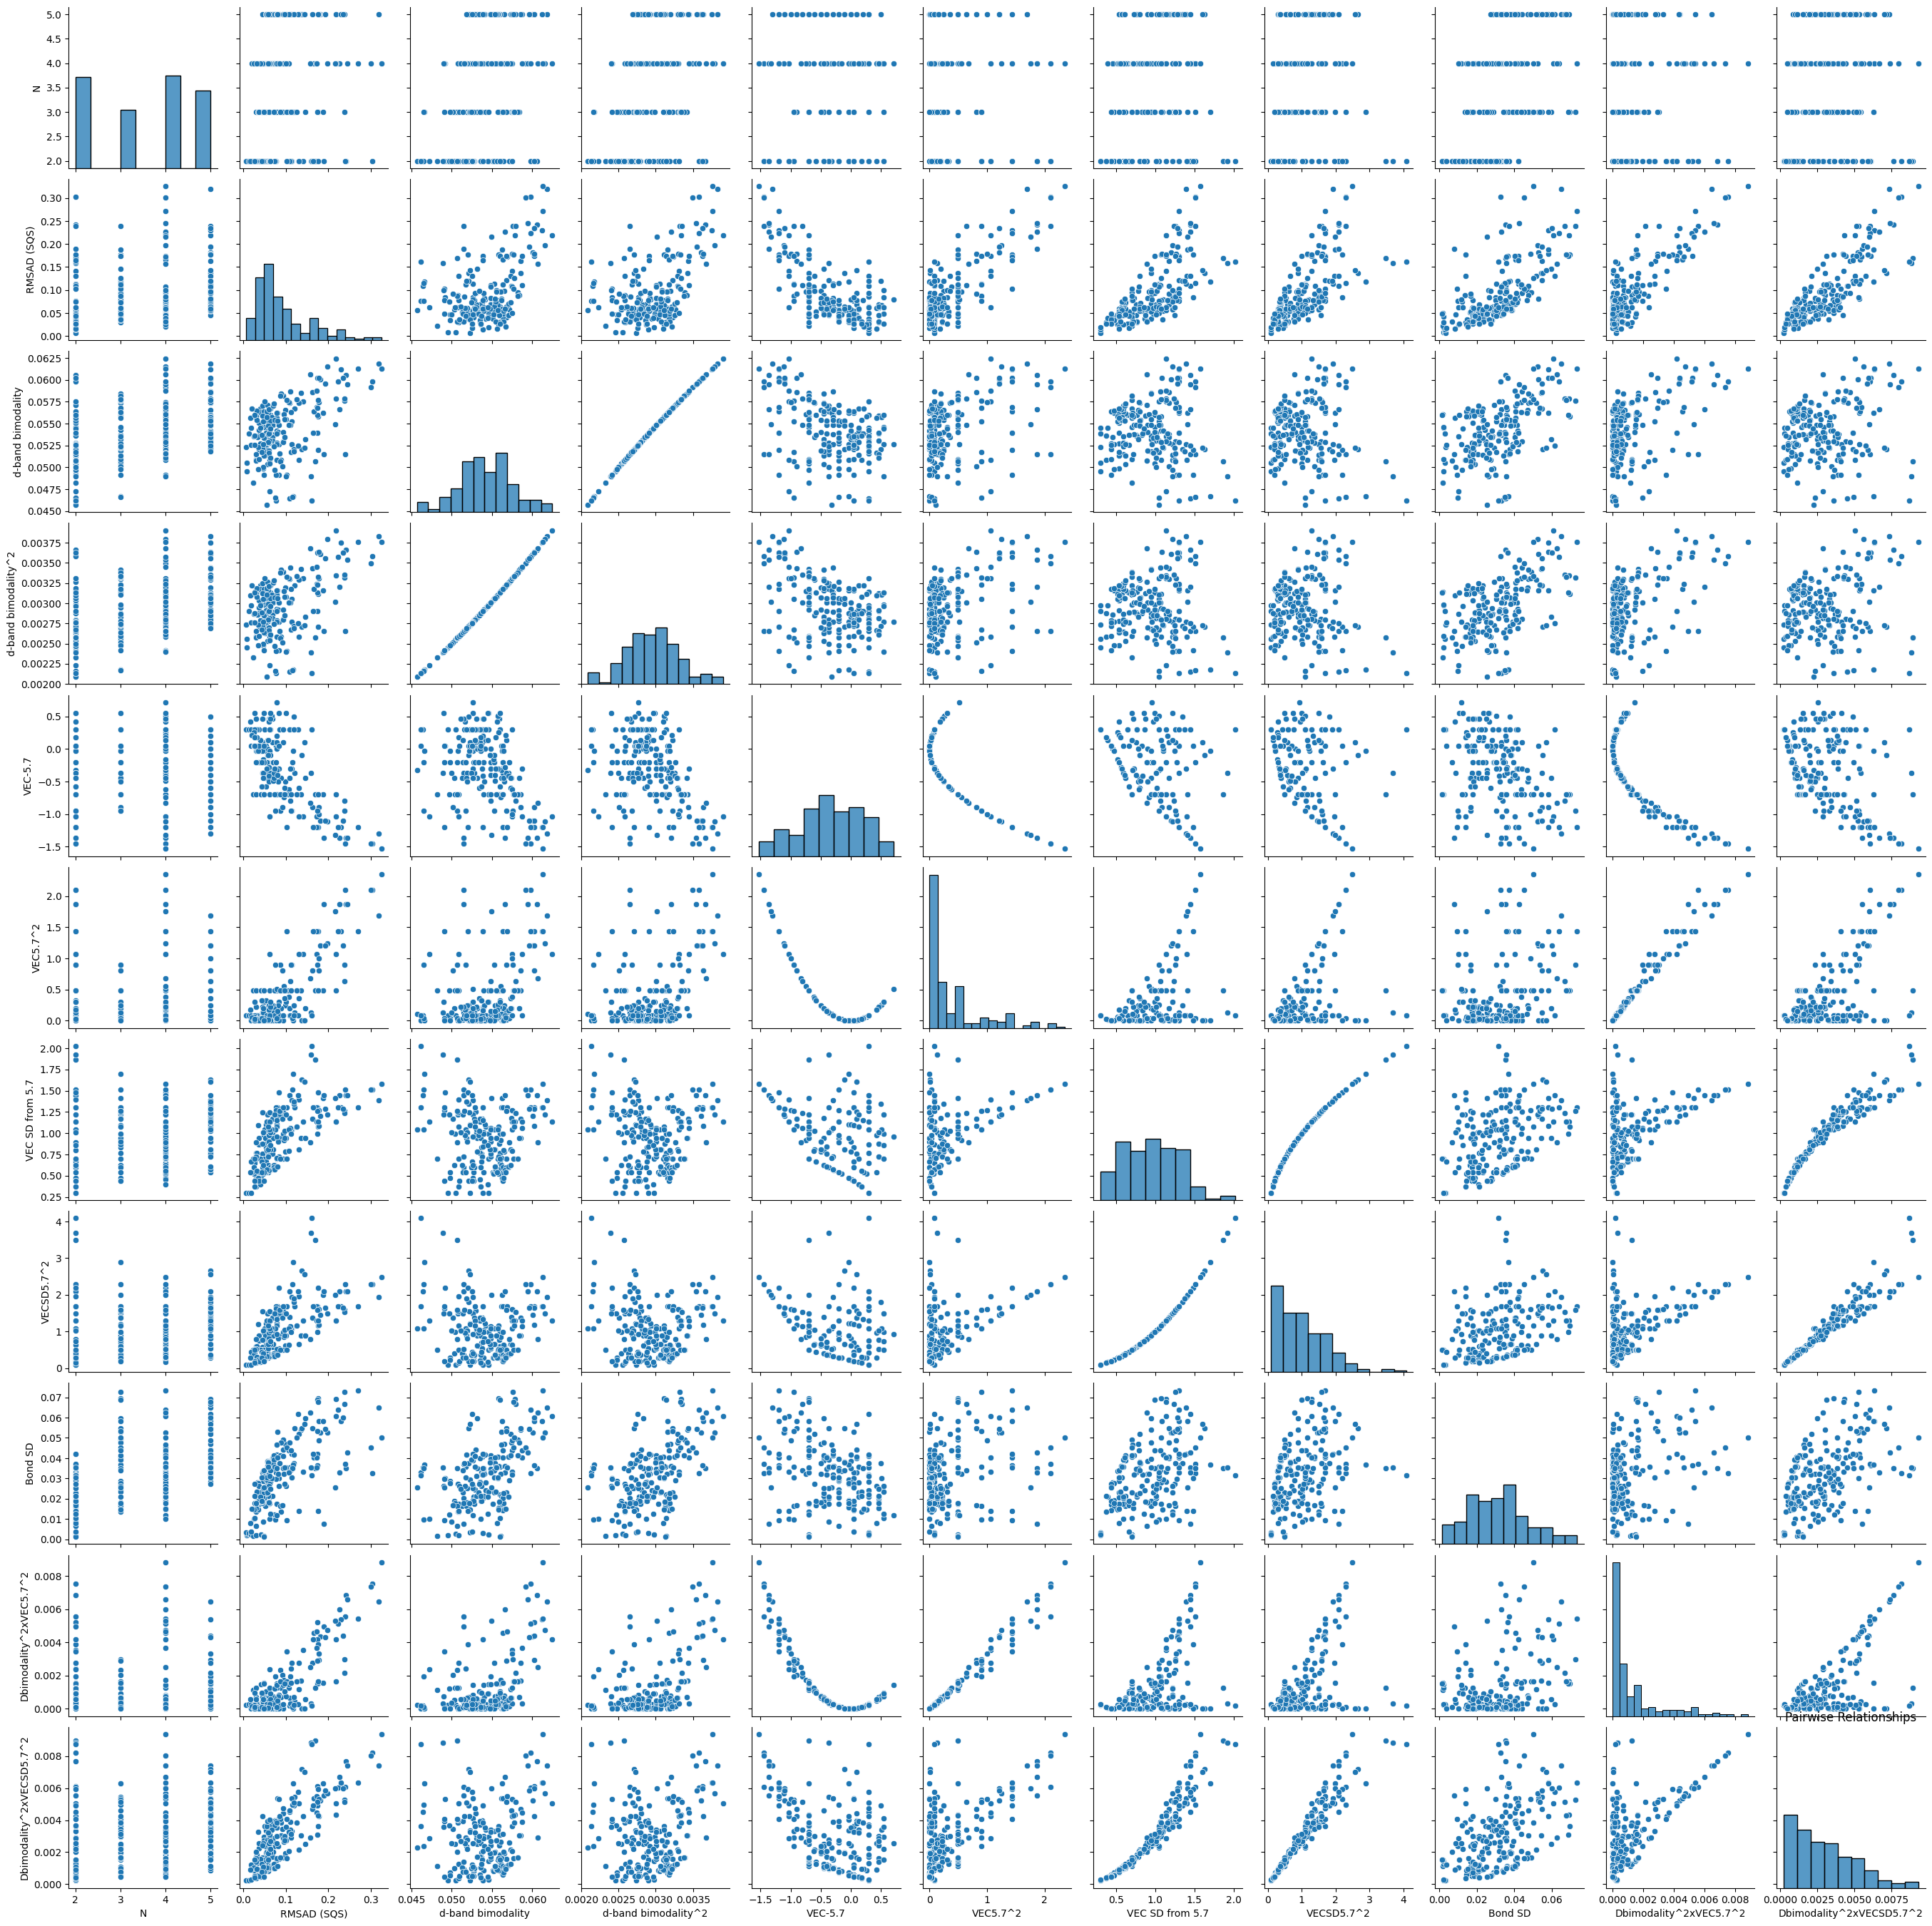

In [110]:
# Pairplot
sns.pairplot(data)
plt.title('Pairwise Relationships')
plt.show()

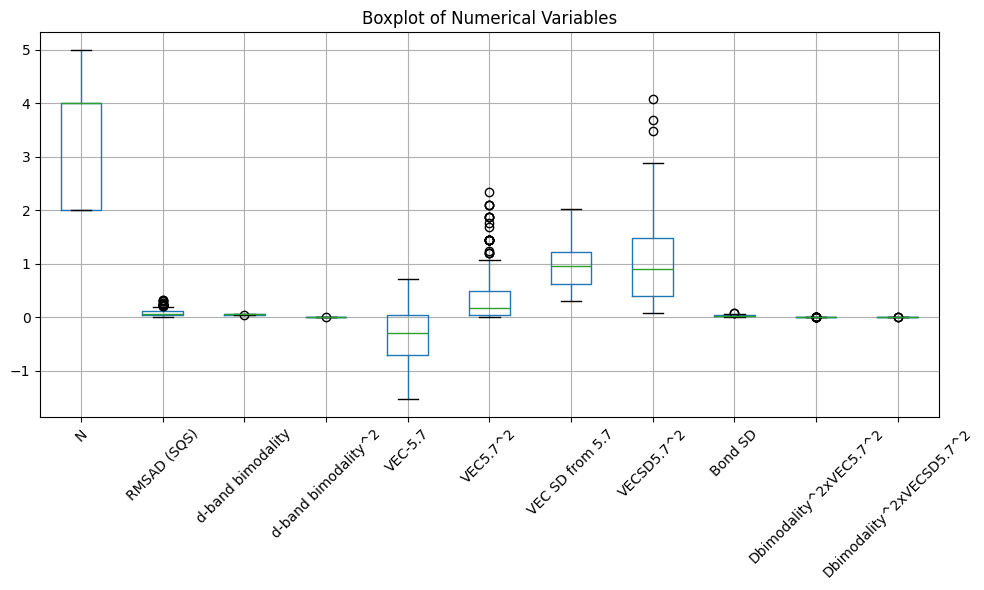

In [107]:

# Boxplot
def boxplot(data):
    fig, ax = plt.subplots(figsize=(10, 6))
    data.boxplot(ax=ax)
    plt.title('Boxplot of Numerical Variables')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

boxplot(data)


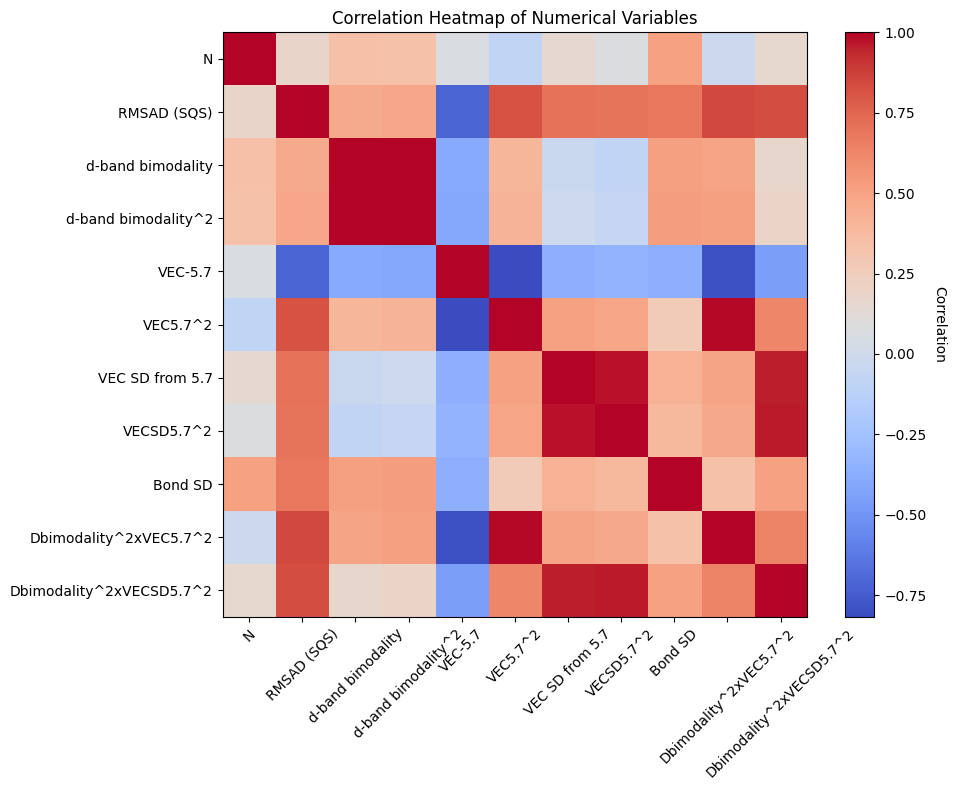

In [109]:
def correlation_heatmap(data):
    # Exclude non-numeric columns
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    
    # Calculate correlation matrix
    corr_matrix = numeric_data.corr()
    
    # Plot heatmap
    fig, ax = plt.subplots(figsize=(10, 8))
    im = ax.imshow(corr_matrix, cmap='coolwarm')
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('Correlation', rotation=-90, va='bottom')
    ax.set_xticks(np.arange(len(corr_matrix.columns)))
    ax.set_yticks(np.arange(len(corr_matrix.columns)))
    ax.set_xticklabels(corr_matrix.columns)
    ax.set_yticklabels(corr_matrix.columns)
    plt.title('Correlation Heatmap of Numerical Variables')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

correlation_heatmap(data)



In [25]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Model 1: Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_pred = linear_reg.predict(X_test)
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
linear_reg_r2 = r2_score(y_test, linear_reg_pred)
print("Linear Regression MSE:", linear_reg_mse)
print("Linear Regression R-squared:", linear_reg_r2)

Linear Regression MSE: 0.00032267423292808004
Linear Regression R-squared: 0.935722895644015


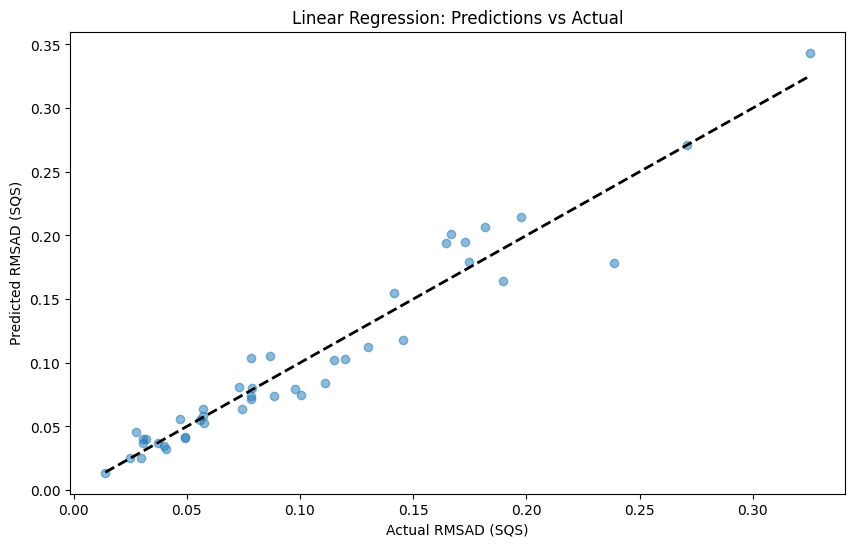

In [29]:
# Plot Predictions vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_reg_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual RMSAD (SQS)')
plt.ylabel('Predicted RMSAD (SQS)')
plt.title('Linear Regression: Predictions vs Actual')
plt.show()


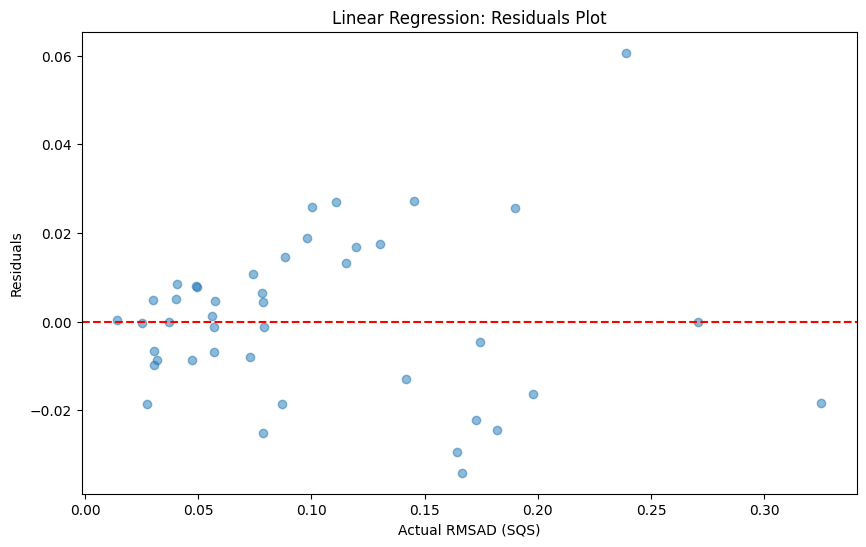

In [30]:
# Plot Residuals
residuals = y_test - linear_reg_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.xlabel('Actual RMSAD (SQS)')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residuals Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [61]:
# Model 2: Random Forest Regression
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_reg_pred = rf_reg.predict(X_test)
rf_reg_mse = mean_squared_error(y_test, rf_reg_pred)
rf_reg_r2 = r2_score(y_test, rf_reg_pred)
print("Random Forest Regression MSE:", rf_reg_mse)
print("Random Forest Regression R-squared:", rf_reg_r2)


Random Forest Regression MSE: 0.00033796183773663057
Random Forest Regression R-squared: 0.9326775859497287


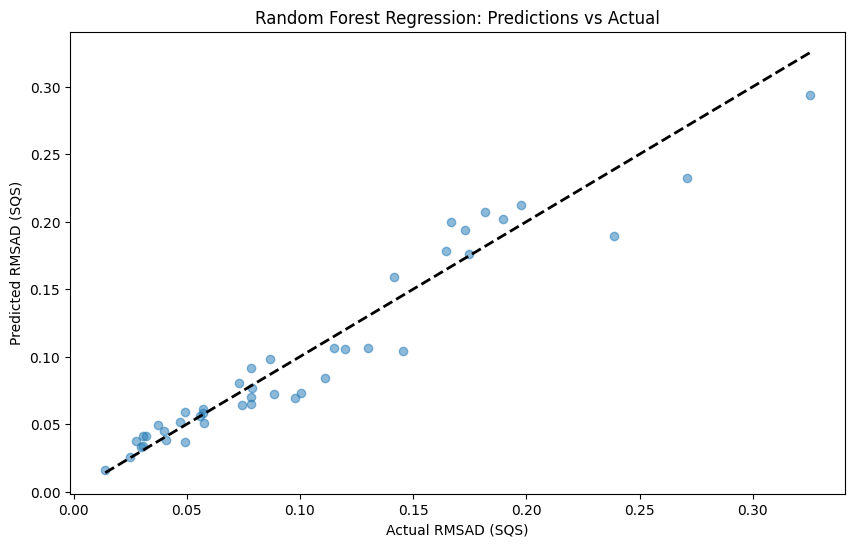

In [62]:
# Plot Predictions vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_reg_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual RMSAD (SQS)')
plt.ylabel('Predicted RMSAD (SQS)')
plt.title('Random Forest Regression: Predictions vs Actual')
plt.show()


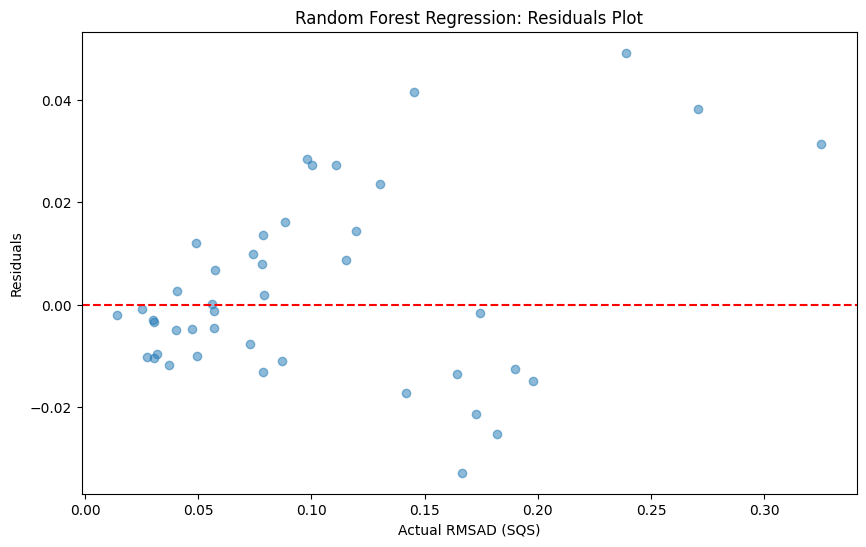

In [63]:
# Plot Residuals
residuals = y_test - rf_reg_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.xlabel('Actual RMSAD (SQS)')
plt.ylabel('Residuals')
plt.title('Random Forest Regression: Residuals Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [64]:
# Feature Importance for Random Forest Regression
feature_importance_rf = rf_reg_best.feature_importances_
print("Random Forest Regression Feature Importance:\n", feature_importance_rf)


Random Forest Regression Feature Importance:
 [0.00676778 0.07329618 0.04949428 0.1030894  0.10256656 0.06709079
 0.06758077 0.08313868 0.20166804 0.24530751]


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns


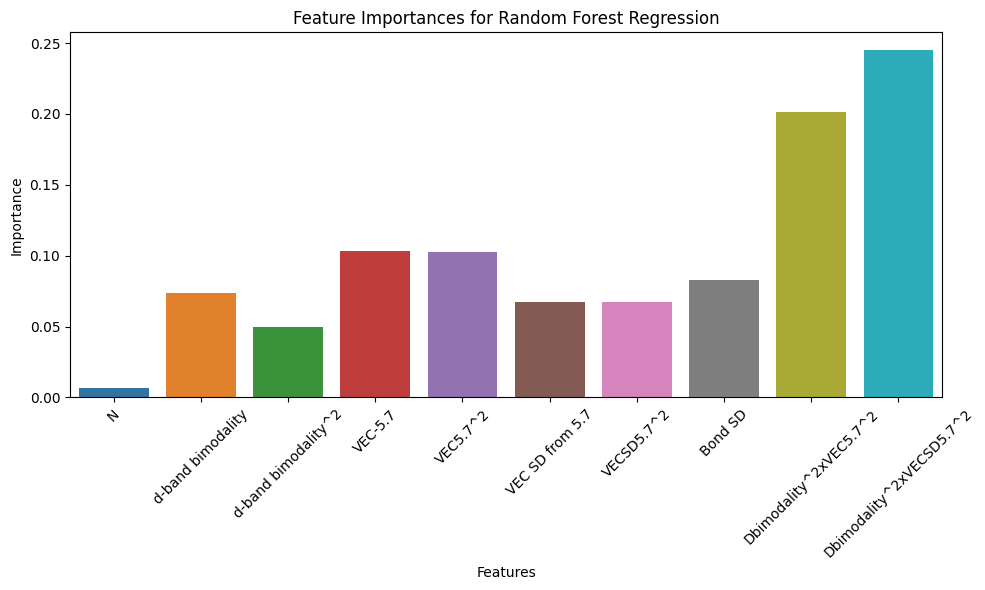

In [68]:

# Plot Feature Importances for Random Forest Regression
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=feature_importance_rf)
plt.title('Feature Importances for Random Forest Regression')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


In [71]:

# Model 3: Gradient Boosting Regression
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)
gb_reg_pred = gb_reg.predict(X_test)
gb_reg_mse = mean_squared_error(y_test, gb_reg_pred)
gb_reg_r2 = r2_score(y_test, gb_reg_pred)
print("Gradient Boosting Regression MSE:", gb_reg_mse)
print("Gradient Boosting Regression R-squared:", gb_reg_r2)


Gradient Boosting Regression MSE: 0.00033880162439632215
Gradient Boosting Regression R-squared: 0.9325102994134846


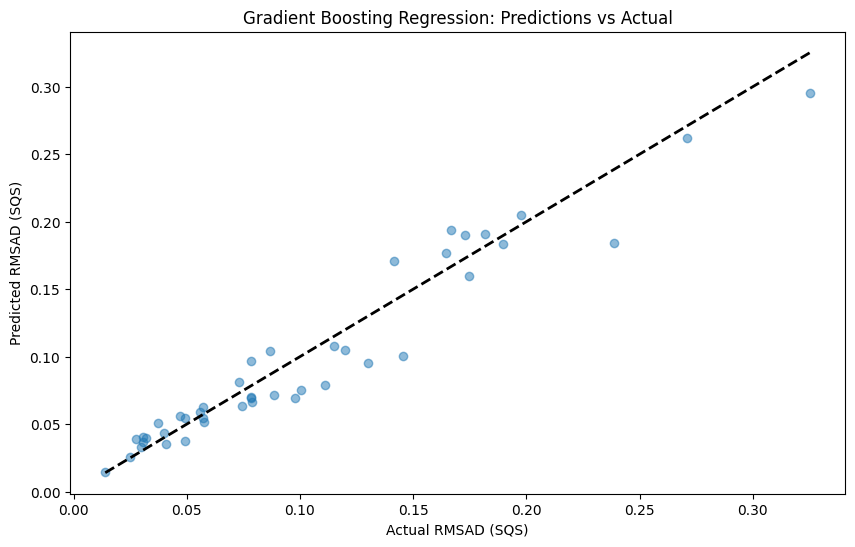

In [72]:
# Plot Predictions vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, gb_reg_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual RMSAD (SQS)')
plt.ylabel('Predicted RMSAD (SQS)')
plt.title('Gradient Boosting Regression: Predictions vs Actual')
plt.show()


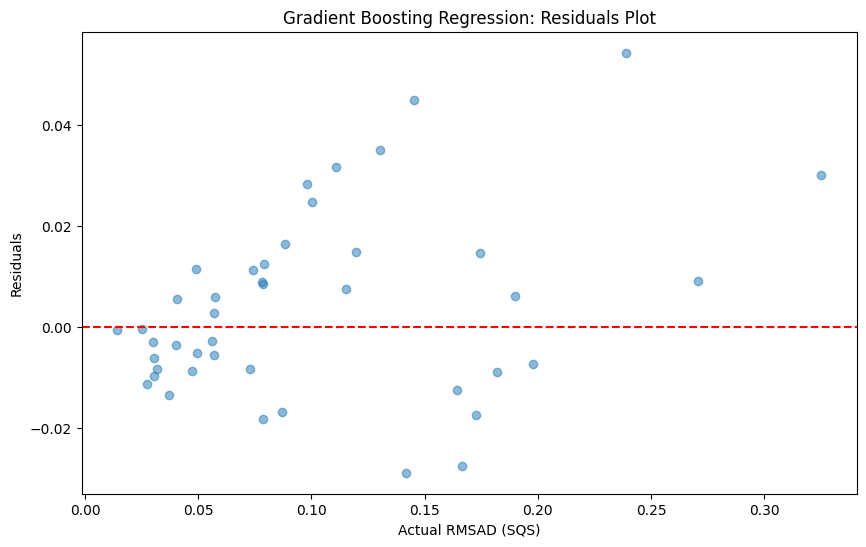

In [73]:

# Plot Residuals
residuals = y_test - gb_reg_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.xlabel('Actual RMSAD (SQS)')
plt.ylabel('Residuals')
plt.title('Gradient Boosting Regression: Residuals Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [74]:
# Feature Importance for Gradient Boosting Regression
feature_importance_gb = gb_reg.feature_importances_
print("Gradient Boosting Regression Feature Importance:\n", feature_importance_gb)


Gradient Boosting Regression Feature Importance:
 [0.00074993 0.00299808 0.00194847 0.0129655  0.00789618 0.00583901
 0.0053405  0.11147291 0.26356564 0.58722378]


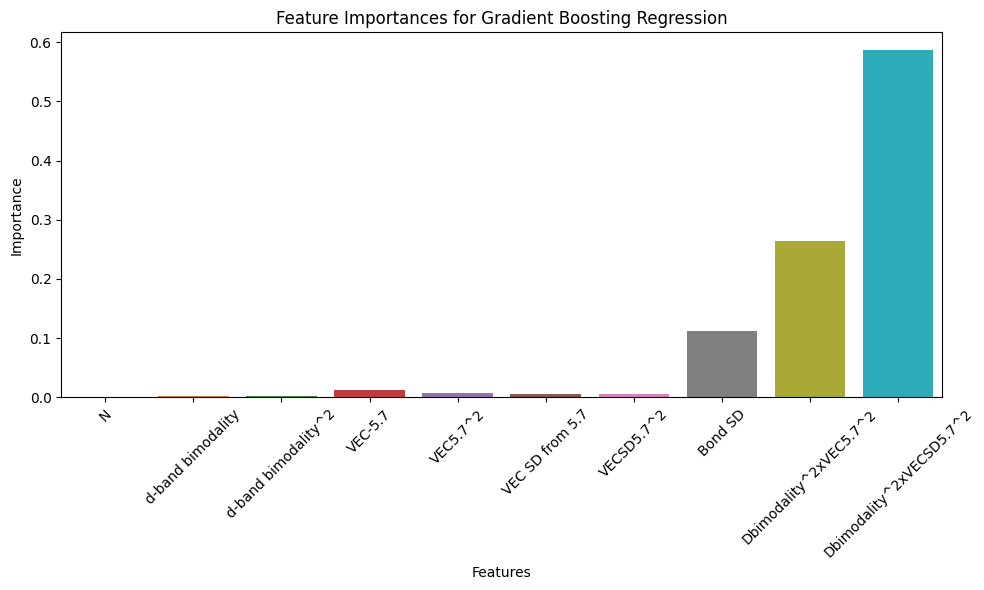

In [75]:
# Plot Feature Importances for Gradient Boosting Regression
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=feature_importance_gb)
plt.title('Feature Importances for Gradient Boosting Regression')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


In [76]:
# Model 4: Support Vector Regression
svr_reg = SVR()
svr_reg.fit(X_train, y_train)
svr_reg_pred = svr_reg.predict(X_test)
svr_reg_mse = mean_squared_error(y_test, svr_reg_pred)
svr_reg_r2 = r2_score(y_test, svr_reg_pred)
print("Support Vector Regression MSE:", svr_reg_mse)
print("Support Vector Regression R-squared:", svr_reg_r2)


Support Vector Regression MSE: 0.004319594263785737
Support Vector Regression R-squared: 0.13953150597322472


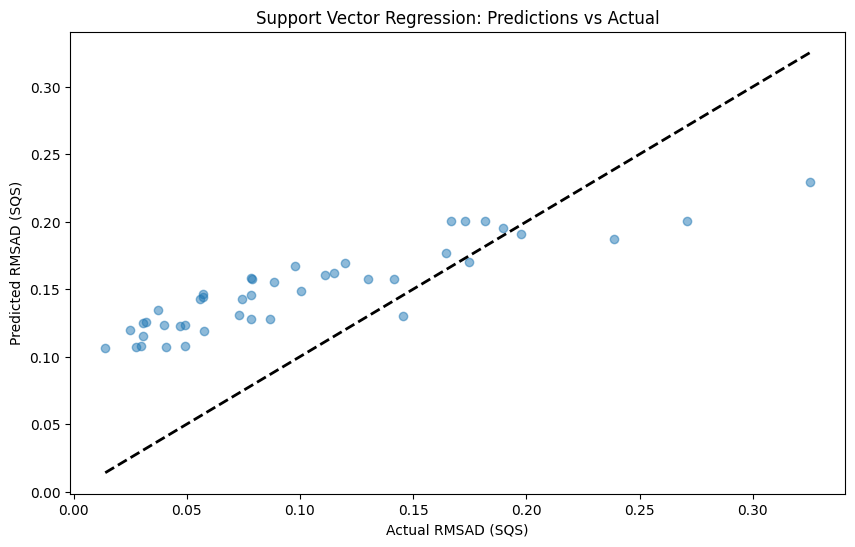

In [77]:
# Plot Predictions vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svr_reg_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual RMSAD (SQS)')
plt.ylabel('Predicted RMSAD (SQS)')
plt.title('Support Vector Regression: Predictions vs Actual')
plt.show()


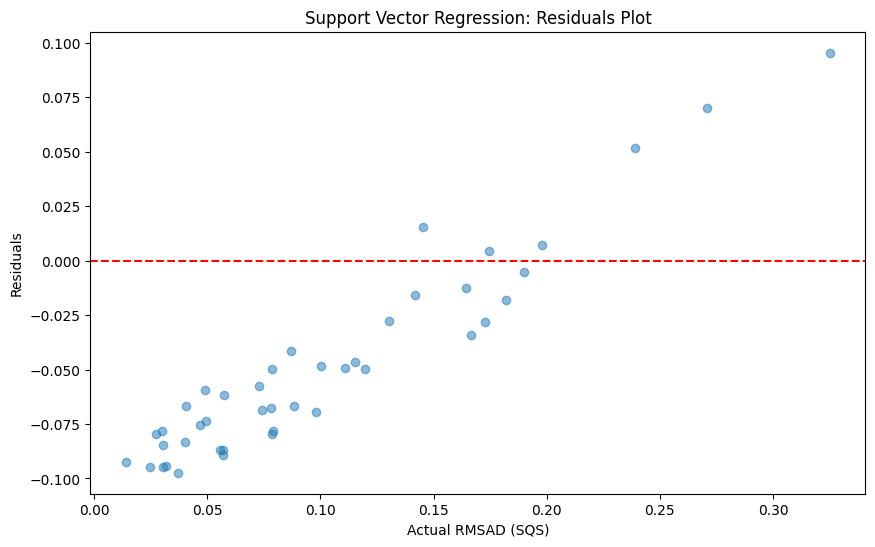

In [78]:
# Plot Residuals
residuals = y_test - svr_reg_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.xlabel('Actual RMSAD (SQS)')
plt.ylabel('Residuals')
plt.title('Support Vector Regression: Residuals Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [87]:
import numpy as np

# Analyze Coefficients for Linear SVR
if isinstance(svr_reg, SVR) and svr_reg.kernel == 'linear':
    coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': svr_reg.coef_.flatten()})
    coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
    print("Coefficients for Linear SVR:\n", coef_df)
    
    # Plot Coefficients for Linear SVR
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coefficient', y='Feature', data=coef_df)
    plt.title('Feature Coefficients for Linear SVR')
    plt.xlabel('Coefficient')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
else:
    print("SVR model is not linear. Cannot analyze coefficients.")


SVR model is not linear. Cannot analyze coefficients.


In [80]:
# Model 5: Neural Network Regression
nn_reg = MLPRegressor(max_iter=1000)  # Increase max_iter if needed
nn_reg.fit(X_train, y_train)
nn_reg_pred = nn_reg.predict(X_test)
nn_reg_mse = mean_squared_error(y_test, nn_reg_pred)
nn_reg_r2 = r2_score(y_test, nn_reg_pred)
print("Neural Network Regression MSE:", nn_reg_mse)
print("Neural Network Regression R-squared:", nn_reg_r2)


Neural Network Regression MSE: 0.0014156456835548912
Neural Network Regression R-squared: 0.7180016374185083


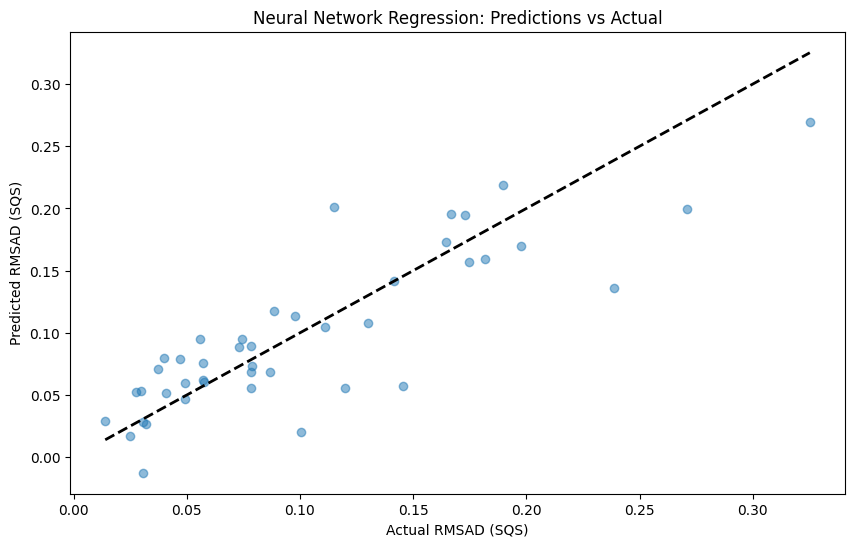

In [81]:
# Plot Predictions vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, nn_reg_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual RMSAD (SQS)')
plt.ylabel('Predicted RMSAD (SQS)')
plt.title('Neural Network Regression: Predictions vs Actual')
plt.show()


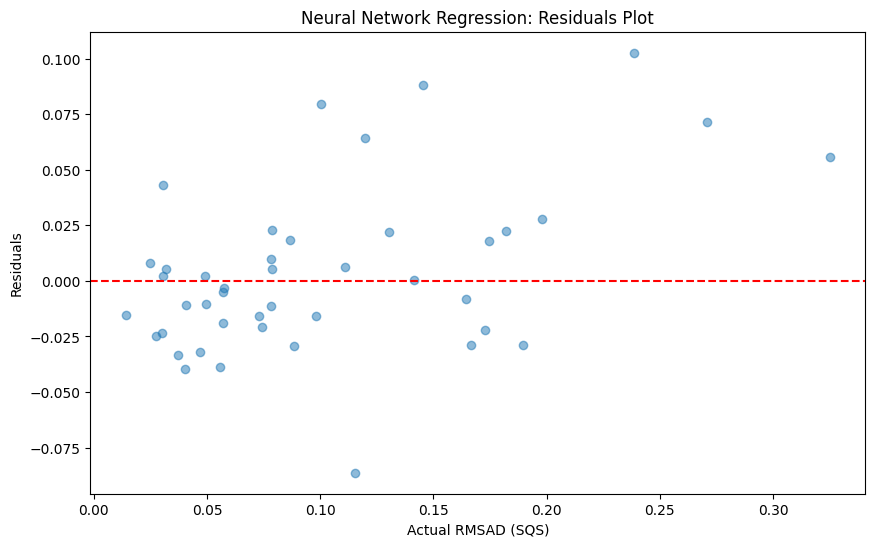

In [82]:
# Plot Residuals
residuals = y_test - nn_reg_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.xlabel('Actual RMSAD (SQS)')
plt.ylabel('Residuals')
plt.title('Neural Network Regression: Residuals Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [83]:
# Analyze Weights of Input Layer for Neural Network Regression
if isinstance(nn_reg, MLPRegressor):
    input_layer_weights = nn_reg.coefs_[0]
    feature_importance_nn = np.abs(input_layer_weights).mean(axis=1)
    feature_importance_nn /= feature_importance_nn.sum()  # Normalize
    feature_importance_nn = pd.Series(feature_importance_nn, index=X.columns)
    feature_importance_nn_sorted = feature_importance_nn.sort_values(ascending=False)
    print("Feature Importance for Neural Network Regression:\n", feature_importance_nn_sorted)


Feature Importance for Neural Network Regression:
 Dbimodality^2xVEC5.7^2      0.108782
VECSD5.7^2                  0.106794
N                           0.106244
Dbimodality^2xVECSD5.7^2    0.101561
d-band bimodality^2         0.100073
d-band bimodality           0.097408
VEC SD from 5.7             0.097370
Bond SD                     0.096147
VEC-5.7                     0.093128
VEC5.7^2                    0.092494
dtype: float64


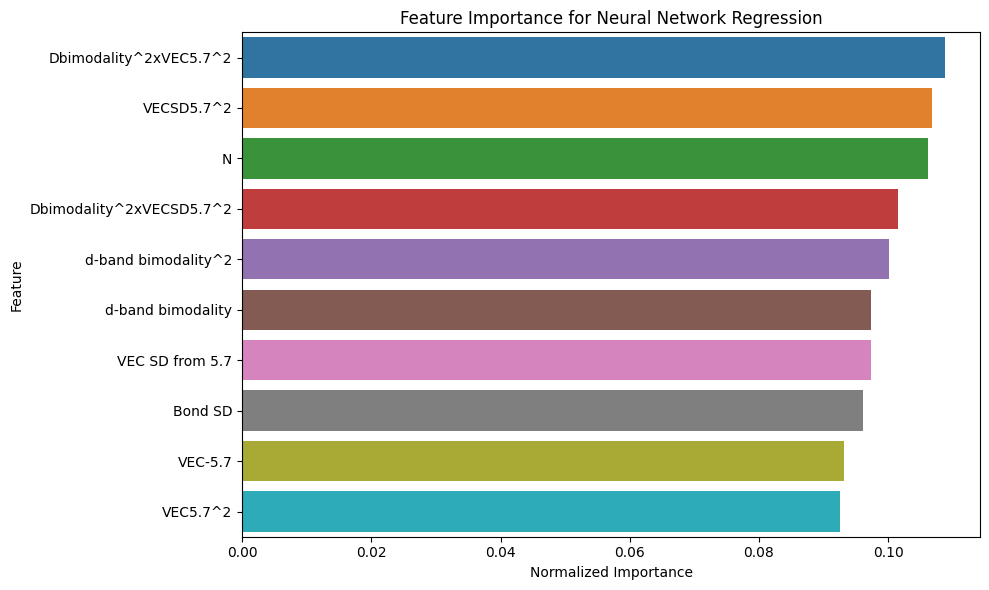

In [86]:
if isinstance(nn_reg, MLPRegressor):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance_nn_sorted.values, y=feature_importance_nn_sorted.index)
    plt.title('Feature Importance for Neural Network Regression')
    plt.xlabel('Normalized Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()


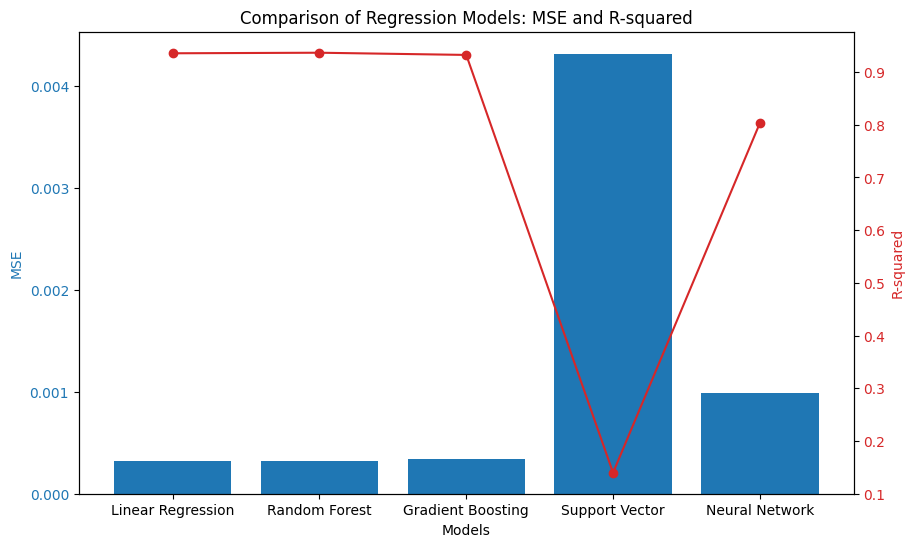

In [51]:

# Model names
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Support Vector', 'Neural Network']

# MSE values
mse_values = [linear_reg_mse, rf_reg_mse, gb_reg_mse, svr_reg_mse, nn_reg_mse]

# R-squared values
r2_values = [linear_reg_r2, rf_reg_r2, gb_reg_r2, svr_reg_r2, nn_reg_r2]

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting MSE values
color = 'tab:blue'
ax1.set_xlabel('Models')
ax1.set_ylabel('MSE', color=color)
ax1.bar(models, mse_values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Twin axis for R-squared values
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('R-squared', color=color)
ax2.plot(models, r2_values, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Title and show plot
plt.title('Comparison of Regression Models: MSE and R-squared')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error


In [52]:
from sklearn.preprocessing import PolynomialFeatures

In [53]:
# Data augmentation using PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_augmented = poly.fit_transform(X_train)
X_test_augmented = poly.transform(X_test)

In [54]:
# Model training and evaluation with augmented data
linear_reg = LinearRegression()
linear_reg.fit(X_train_augmented, y_train)
linear_reg_pred = linear_reg.predict(X_test_augmented)
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
print("Linear Regression MSE (with data augmentation):", linear_reg_mse)

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_augmented, y_train)
rf_reg_pred = rf_reg.predict(X_test_augmented)
rf_reg_mse = mean_squared_error(y_test, rf_reg_pred)
print("Random Forest Regression MSE (with data augmentation):", rf_reg_mse)

gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train_augmented, y_train)
gb_reg_pred = gb_reg.predict(X_test_augmented)
gb_reg_mse = mean_squared_error(y_test, gb_reg_pred)
print("Gradient Boosting Regression MSE (with data augmentation):", gb_reg_mse)

svr_reg = SVR()
svr_reg.fit(X_train_augmented, y_train)
svr_reg_pred = svr_reg.predict(X_test_augmented)
svr_reg_mse = mean_squared_error(y_test, svr_reg_pred)
print("Support Vector Regression MSE (with data augmentation):", svr_reg_mse)

nn_reg = MLPRegressor(max_iter=1000)  # Increase max_iter if needed
nn_reg.fit(X_train_augmented, y_train)
nn_reg_pred = nn_reg.predict(X_test_augmented)
nn_reg_mse = mean_squared_error(y_test, nn_reg_pred)
print("Neural Network Regression MSE (with data augmentation):", nn_reg_mse)

Linear Regression MSE (with data augmentation): 0.0003981462195142449
Random Forest Regression MSE (with data augmentation): 0.00039256983844313865
Gradient Boosting Regression MSE (with data augmentation): 0.0003277700889403477
Support Vector Regression MSE (with data augmentation): 0.004276255971650812
Neural Network Regression MSE (with data augmentation): 0.005024480071294066


       Actual  Linear Regression  Random Forest  Gradient Boosting  \
9    0.141629           0.133777       0.167234           0.165977   
197  0.238769           0.211750       0.190396           0.186771   
66   0.030506           0.033450       0.043442           0.039424   
191  0.078503           0.067632       0.067833           0.072978   
117  0.189741           0.169209       0.141127           0.137303   

     Support Vector  Neural Network  
9          0.146394        0.100218  
197        0.187276        0.011425  
66         0.112836        0.031742  
191        0.158533        0.045098  
117        0.191603        0.168163  


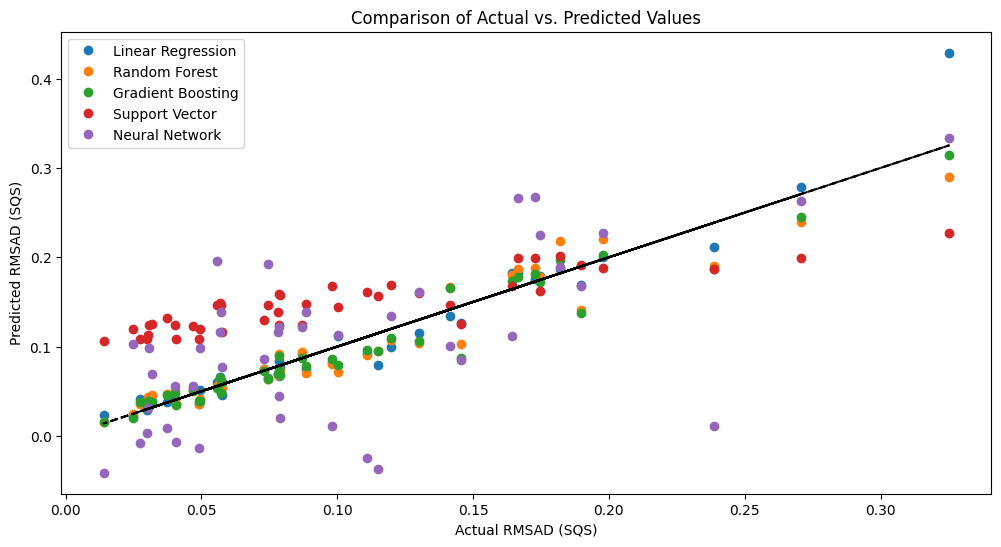

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame to store actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 
                           'Linear Regression': linear_reg_pred,
                           'Random Forest': rf_reg_pred,
                           'Gradient Boosting': gb_reg_pred,
                           'Support Vector': svr_reg_pred,
                           'Neural Network': nn_reg_pred})

# Display the first few rows of the DataFrame
print(results_df.head())

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
for model in results_df.columns[1:]:
    plt.plot(results_df['Actual'], results_df[model], marker='o', linestyle='', label=model)
plt.plot(results_df['Actual'], results_df['Actual'], color='black', linestyle='--')
plt.xlabel('Actual RMSAD (SQS)')
plt.ylabel('Predicted RMSAD (SQS)')
plt.title('Comparison of Actual vs. Predicted Values')
plt.legend()
plt.show()


In [56]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter Tuning (Random Search for Random Forest)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf_random = RandomizedSearchCV(estimator=rf_reg, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)
print("Best Parameters (Random Search):", rf_random.best_params_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
153 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
87 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\ProgramData\anaconda3\Lib\site-package

Best Parameters (Random Search): {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}


In [58]:
from sklearn.ensemble import RandomForestRegressor

# Best parameters from RandomizedSearchCV
best_params = {
    'n_estimators': 200,
    'max_depth': 20,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt'
}

# Create a Random Forest Regressor with the best parameters
rf_reg_best = RandomForestRegressor(**best_params)

# Fit the model on the training data
rf_reg_best.fit(X_train, y_train)

# Predict on the test data
rf_reg_best_pred = rf_reg_best.predict(X_test)

# Calculate MSE
rf_reg_best_mse = mean_squared_error(y_test, rf_reg_best_pred)
print("Random Forest Regression with Best Parameters MSE:", rf_reg_best_mse)



rf_reg_best_r2 = r2_score(y_test, rf_reg_best_pred)
#print("Random Forest Regression MSE:", rf_reg_mse)
print("Random Forest Regression with Best Parameters R-squared:", rf_reg_best_r2)



Random Forest Regression with Best Parameters MSE: 0.00033127995130462494
Random Forest Regression with Best Parameters R-squared: 0.934008625951242


In [ ]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

# Load the dataset
data = pd.read_csv("your_dataset.csv")

# Data Augmentation
# Let's create polynomial features up to the second degree for numerical features
poly = PolynomialFeatures(degree=2, include_bias=False)
num_cols = ["N", "d-band bimodality", "d-band bimodality^2", "VEC-5.7", "VEC5.7^2",
            "VEC SD from 5.7", "VECSD5.7^2", "Bond SD", "Dbimodality^2xVEC5.7^2",
            "Dbimodality^2xVECSD5.7^2"]
X_augmented = poly.fit_transform(data[num_cols])
augmented_df = pd.DataFrame(X_augmented, columns=poly.get_feature_names(num_cols))
# Concatenate the augmented features with the original dataset
data_augmented = pd.concat([data, augmented_df], axis=1)

# Feature Engineering
# For example, we can create interaction terms between certain features or perform scaling/normalization

# Here's a simplified example of creating interaction terms between 'N' and 'd-band bimodality'
data_augmented["N_d-band_interaction"] = data_augmented["N"] * data_augmented["d-band bimodality"]

# Drop unnecessary columns (e.g., original numerical columns, if desired)
data_augmented.drop(columns=num_cols, inplace=True)

# Now you can proceed with model building using the augmented and engineered features
